In [11]:
import similarity_utils as similarity
from sklearn.metrics.pairwise import cosine_similarity as distance
from random import sample
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sentiment_utils, similarity_utils, nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import requests
from IPython.display import Image

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jmpchamizo/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
URL = "http://localhost:5000/"
CREATE_USER = "user/create/"
CREATE_CHAT = "chat/create/"
users = ["Alberto", "Gonzalo", "Ruben", "Roberto", "Pepe"]
chats = ["Chat1", "Chat2", "Chat3", "Chat4", "Chat5"]

## Vamos a crear los usuarios del chat

#### Nota: No esta ejecutado en la versión que envio para que sólo esten la conversaciones de Battlestar Gallactica, pero el código funciona y si se ejecuta se introducirán los users chats o mensajes

### Introducimos usuarios:

In [4]:
users_dict = dict()
for user in users:
    user_id = requests.get(f"{URL}{CREATE_USER}{user}").text[1:-1]
    if user_id != "Ya existe ese usuario":
        users_dict[user] = user_id
users_dict

{'Alberto': '5e500c294651858f07df8487',
 'Gonzalo': '5e500c294651858f07df8488',
 'Ruben': '5e500c294651858f07df8489',
 'Roberto': '5e500c294651858f07df848a',
 'Pepe': '5e500c294651858f07df848b'}

In [5]:
requests.get(f"{URL}{CREATE_USER}Alberto").text

'"5e500c294651858f07df8487"'

### Introducimos chats

In [8]:
chats_dict = dict()
for chat in chats:
    us = sample(list(users_dict.values()),2)
    chat_id = requests.get(f"{URL}{CREATE_CHAT}{chat}?users={','.join(us)}").text[1:-1]
    if chat_id != "Ya existe ese chat":
        chats_dict[chat] = chat_id
chats_dict

{'Chat1': 'a existe ese cha',
 'Chat2': 'a existe ese cha',
 'Chat3': 'a existe ese cha',
 'Chat4': 'a existe ese cha',
 'Chat5': 'a existe ese cha'}

### Añadimos mensajes

In [9]:
chat_id = "5e500c2b4651858f07df848d"
user_id = "5e500c294651858f07df8489"
add_message = f"/chat/{chat_id}/addmessage"
us = {"user": user_id,
      "text": "Hola"  }

message_id = requests.post(f"{URL}{add_message}", json = us).text[1:-1]

message_id

'5e5397e65cb7df222b81dcf6'

## Calculamos similaridades entre usuarios

In [10]:
similarity.get_dataframe_similarity_users().idxmax()

Adama                    Lee
Boomer            Number One
Caprica-Six     Gaius Baltar
Ellen Tigh             Adama
Gaeta           Gaius Baltar
Gaius Baltar       Saul Tigh
Helo                   Gaeta
Laura Roslin       Saul Tigh
Lee                    Adama
Number Five        Saul Tigh
Number One         Saul Tigh
Saul Tigh       Gaius Baltar
Starbuck               Adama
Tory                   Adama
Tyrol                  Adama
dtype: object

### Los resultados son interesantes ya que Lee y Adama son padre e hijo

In [11]:
similarity.get_user_similarity("Jose")

"User doesn't exist"

In [12]:
similarity.get_user_similarity("Adama")

Lee             0.569202
Starbuck        0.540491
Saul Tigh       0.529781
Ellen Tigh      0.514585
Gaius Baltar    0.492544
Name: Adama, dtype: float64

### En este caso también salen resultatos muy chulos ya que las tres primeras recomendaciones son tres de las personas más importantes para Adama en la serie y en el caso de Starbuck, creo que no hay ningúna conversación entre ellos dos.

## Similaridades entre chats

In [4]:
similarity.get_dataframe_similarity_chats().idxmax()

City of the Gods             save the people
I believe in this        I'm one of the Five
I have no guilt          I'm one of the Five
I'm one of the Five        I believe in this
It's a frakking Cylon        save the people
No one suspected         I'm one of the Five
You love me!               I believe in this
end the cycle of war     I'm one of the Five
presentations            I'm one of the Five
save the people             City of the Gods
they let us go               save the people
dtype: object

In [21]:
similarity.get_chat_similarity("No one suspected")

I'm one of the Five    0.354946
save the people        0.347880
presentations          0.341809
You love me!           0.312489
I believe in this      0.250435
Name: No one suspected, dtype: float64

### Similaridades entere ususarios y chats en base a sentimientos.

In [22]:
sentiment_utils.get_chats_for_user("Starbuck")

You love me!             0.890908
I have no guilt          0.861626
No one suspected         0.858176
they let us go           0.818288
It's a frakking Cylon    0.778962
Name: Starbuck, dtype: float64

In [23]:
sentiment_utils.get_chats_for_user("Adama")

You love me!             0.962812
I have no guilt          0.867973
No one suspected         0.976103
they let us go           0.991238
It's a frakking Cylon    0.992358
Name: Adama, dtype: float64

### Pruebas con la api

In [29]:
requests.get(f"{URL}user/Gaius Baltar/similarity").text

'{"Saul Tigh": 0.6524412723262752, "Laura Roslin": 0.6160988025205353, "Caprica-Six": 0.5923476791369434, "Number One": 0.5507095166444731, "Adama": 0.4925436111462105}'

In [30]:
requests.get(f"{URL}chat/end the cycle of war/similarity").text

'{"I\'m one of the Five": 0.49946033443529614, "save the people": 0.47419941283472683, "You love me!": 0.43130290941990734, "I believe in this": 0.43049760200050513, "presentations": 0.39968304204565114}'

In [31]:
requests.get(f"{URL}user/Gaius Baltar/chats").text

'{"You love me!": 0.9596195230959763, "I have no guilt": 0.9289474653640429, "No one suspected": 0.9842711598509909, "they let us go": 0.9882270386526544, "It\'s a frakking Cylon": 0.9682012875831076}'

#### Nota: Si se prueba el chat al introducir un nuevo usuario este no funcionará bien hasta que todos los usuarios tengan chat y mensajes.

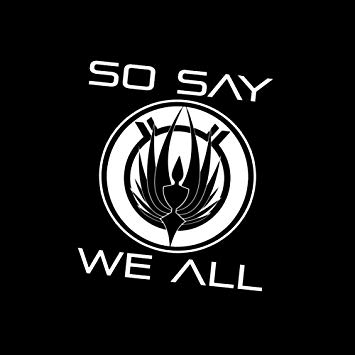

In [12]:
Image(filename = "../img/so_say_we_all.jpg")